<a href="https://colab.research.google.com/github/SantosCristiano/artificial-intelligence-python/blob/main/01_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow 1

## Aula 13 - Tensor Flow - Redes Neurais - Regressão Simples

### Importando o tensorflow e o numpy

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
n_features = 10
n_dense_neurons = 3

### O segundo parâmetro de placeholder é o formato, Onde tem o <strong>None</strong>, são os registros, ou seja, as linhas e <strong>n_features</strong> são as colunas.

In [3]:
x = tf.placeholder(tf.float32, (None, n_features))

### Variáveis <strong>W</strong>(Weight) e <strong>b</strong>(Bias)

In [4]:
b = tf.Variable(tf.ones([n_dense_neurons]))
print(b)

<tf.Variable 'Variable:0' shape=(3,) dtype=float32_ref>


In [5]:
W = tf.Variable(tf.random_normal([n_features, n_dense_neurons]))
b = tf.Variable(tf.ones([n_dense_neurons]))

In [6]:
xW = tf.matmul(x, W)

In [7]:
z = tf.add(xW, b)

### Vamos passar pela função de ativação

In [8]:
a = tf.sigmoid(z)

## Execução

In [9]:
init = tf.global_variables_initializer()

In [10]:
with tf.Session() as sess:
  sess.run(init)
  layer_out = sess.run(a, feed_dict={x: np.random.random([1, n_features])})

### Resultado, números entre 0 e 1, porque estamos usando a função de ativação Sigmoid

In [11]:
print(layer_out)

[[0.8939974  0.32485622 0.67734665]]


### A execução aconteceu uma vez

Mas, a execução de uma rede neural tem que voltar (backpropagation) e ajustar os pesos e os vieses baseado em uma função de custo.

### Os valores de <strong>W</strong> e <strong>b</strong> devem sempre ser ajustados.

# Regressão simples

### Para esse exemplo, precisamos de dados distribuídos de forma linear para nosso modelo prever os valores depois

O <strong>np.random.uniform(-1.5, 1.5, 10)</strong> é para adicionar ruído aos dados de <strong>x_data</strong> e <strong>y_label</strong>

In [12]:
x_data = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)

In [13]:
x_data

array([-0.2525924 ,  0.43690533,  1.8204763 ,  3.34439361,  4.03487312,
        6.25797474,  5.40234547,  6.68824865,  8.65566813, 10.33932449])

In [14]:
y_label = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)

In [15]:
y_label

array([1.29067308, 2.40270607, 3.39333533, 3.67169622, 5.35572293,
       5.17626835, 7.78839723, 8.6974606 , 7.69656399, 8.60107153])

In [16]:
import matplotlib .pyplot as plt
%matplotlib inline

## Plotando os dados <strong>x_data</strong> e <strong>y_label</strong>

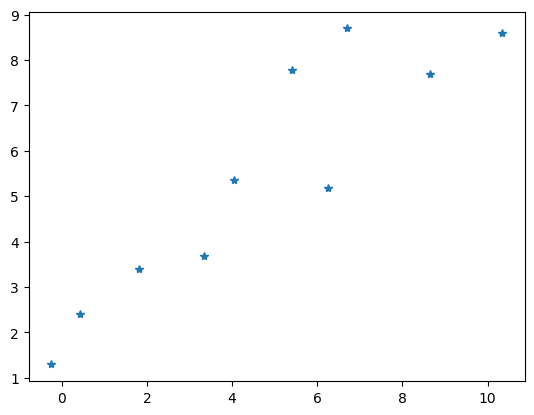

In [17]:
plt.plot(x_data, y_label, '*')

## Criando a rede neural <br />
Queremos que a rede resolva a seguinte equação: <br />
<strong>y = mx + b</strong>



### Essa linha é só para gerar dois números aleatórios, para colar logo abaixo

In [18]:
np.random.rand(2)

array([0.80843667, 0.39543033])

## Usamos os números gerados na célula acima, para atribuir as variáveis <strong>m</strong> e <strong>b</strong>

In [19]:
m = tf.Variable(0.61)
b = tf.Variable(0.51)

## Calculando o erro

<strong>y_hat</strong> é o valor predito<br />
O <strong>erro</strong> é calculado fazendo a diferença entre o valor correto(<strong>y</strong>) e o valor predito(<strong>y_hat</strong>) elevado a <strong>2</strong>

In [20]:
error = 0
for x, y in zip(x_data, y_label):
  y_hat = m * x + b
  error += (y - y_hat) ** 2

## Agora precisamos minimizar o erro

### para isso vamos fazer uma descida de gradiente

In [21]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

## Execução

In [22]:
init = tf.global_variables_initializer()

In [23]:
with tf.Session() as sess:
  sess.run(init)
  training_steps = 100
  for i in range(training_steps):
    sess.run(train)
  final_slope, final_intercept = sess.run([m, b])

In [24]:
x_test = np.linspace(-1, 11, 10)
# y = mx + b
y_pred_plot = final_slope * x_test + final_intercept

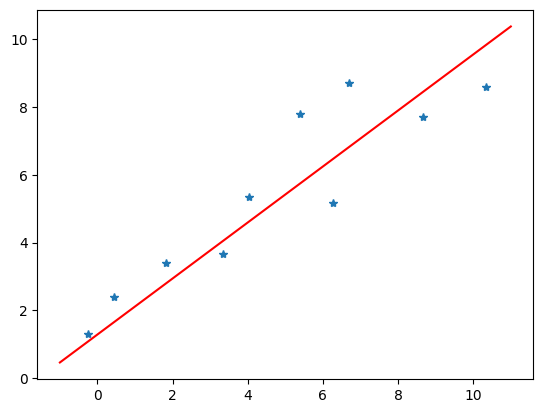

In [25]:
plt.plot(x_test, y_pred_plot, 'red')
plt.plot(x_data, y_label, '*')